In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
os.getcwd()

'C:\\Users\\jumin\\Documents\\패스트캠퍼스\\Part3_Image_Analysis\\실습 코드'

In [10]:
os.listdir('../dataset/mnist_png/training/0')

['1.png',
 '1000.png',
 '10005.png',
 '10010.png',
 '10022.png',
 '10025.png',
 '10026.png',
 '10045.png',
 '10069.png',
 '10071.png',
 '10080.png',
 '10083.png',
 '10107.png',
 '10119.png',
 '10120.png',
 '10121.png',
 '10128.png',
 '10140.png',
 '1015.png',
 '10167.png',
 '10168.png',
 '10176.png',
 '1018.png',
 '10188.png',
 '10195.png',
 '10203.png',
 '10204.png',
 '10221.png',
 '10230.png',
 '10237.png',
 '10240.png',
 '10242.png',
 '10245.png',
 '10254.png',
 '10259.png',
 '10261.png',
 '10265.png',
 '10272.png',
 '10276.png',
 '1028.png',
 '10283.png',
 '1029.png',
 '10323.png',
 '10326.png',
 '10334.png',
 '10340.png',
 '10343.png',
 '10348.png',
 '10352.png',
 '10363.png',
 '10366.png',
 '10372.png',
 '10380.png',
 '10384.png',
 '1040.png',
 '10407.png',
 '10425.png',
 '10439.png',
 '10456.png',
 '1046.png',
 '10469.png',
 '10471.png',
 '10479.png',
 '10488.png',
 '1049.png',
 '10505.png',
 '10523.png',
 '10530.png',
 '10531.png',
 '10542.png',
 '10563.png',
 '10564.png',
 '10

In [8]:
glob('../dataset/mnist_png/training/0/*.png')

['../dataset/mnist_png/training/0\\1.png',
 '../dataset/mnist_png/training/0\\1000.png',
 '../dataset/mnist_png/training/0\\10005.png',
 '../dataset/mnist_png/training/0\\10010.png',
 '../dataset/mnist_png/training/0\\10022.png',
 '../dataset/mnist_png/training/0\\10025.png',
 '../dataset/mnist_png/training/0\\10026.png',
 '../dataset/mnist_png/training/0\\10045.png',
 '../dataset/mnist_png/training/0\\10069.png',
 '../dataset/mnist_png/training/0\\10071.png',
 '../dataset/mnist_png/training/0\\10080.png',
 '../dataset/mnist_png/training/0\\10083.png',
 '../dataset/mnist_png/training/0\\10107.png',
 '../dataset/mnist_png/training/0\\10119.png',
 '../dataset/mnist_png/training/0\\10120.png',
 '../dataset/mnist_png/training/0\\10121.png',
 '../dataset/mnist_png/training/0\\10128.png',
 '../dataset/mnist_png/training/0\\10140.png',
 '../dataset/mnist_png/training/0\\1015.png',
 '../dataset/mnist_png/training/0\\10167.png',
 '../dataset/mnist_png/training/0\\10168.png',
 '../dataset/mnist_

In [12]:
data_paths = glob('../dataset/mnist_png/training/*/*.png')
len(data_paths)

60000

In [13]:
data_paths[-1]

'../dataset/mnist_png/training\\9\\9998.png'

# 데이터 분석 (MNIST)

In [14]:
len(os.listdir('../dataset/mnist_png/training/'))

10

In [16]:
label_nums = os.listdir('../dataset/mnist_png/training/')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [17]:
len(label_nums)

10

Label 0의 데이터 갯수 확인

In [18]:
len(os.listdir('../dataset/mnist_png/training/0'))

5923

### 데이터 별 갯수 비교

In [19]:
nums_dataset = []

for label in label_nums : 
    data_per_class = os.listdir('../dataset/mnist_png/training/'+label)
    nums_dataset.append(len(data_per_class))

In [20]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

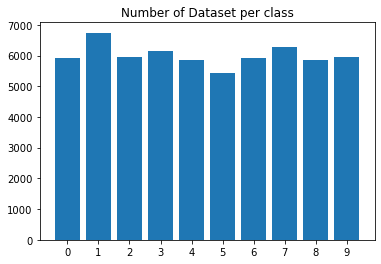

In [21]:
plt.bar(label_nums, nums_dataset)
plt.title("Number of Dataset per class")
plt.show()

# Pillow로 열기

In [23]:
path = "../dataset/mnist_png/training/0/1.png"

In [25]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [26]:
image.shape

(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

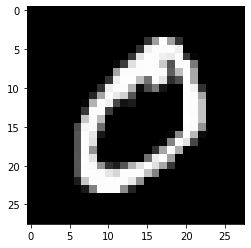

In [27]:
plt.imshow(image, 'gray')
plt.show

# TensorFlow로 열기

In [28]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [29]:
image.shape

TensorShape([28, 28, 1])

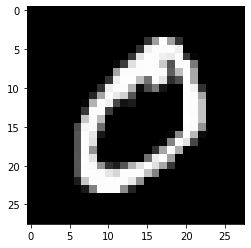

In [31]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# Label 얻기

In [32]:
path

'../dataset/mnist_png/training/0/1.png'

In [38]:
label = path.split('/')[-2]

In [39]:
int(label)

0

In [40]:
def get_label(path):
    class_name = path.split("/")[-2]
    label = int(class_name)
    return label

In [42]:
path, get_label(path)

('../dataset/mnist_png/training/0/1.png', 0)

# 데이터 이미지 사이즈 알기

In [44]:
from tqdm import tqdm_notebook

In [49]:
heights = []
widths = []

In [46]:
data_paths[:10]

['../dataset/mnist_png/training\\0\\1.png',
 '../dataset/mnist_png/training\\0\\1000.png',
 '../dataset/mnist_png/training\\0\\10005.png',
 '../dataset/mnist_png/training\\0\\10010.png',
 '../dataset/mnist_png/training\\0\\10022.png',
 '../dataset/mnist_png/training\\0\\10025.png',
 '../dataset/mnist_png/training\\0\\10026.png',
 '../dataset/mnist_png/training\\0\\10045.png',
 '../dataset/mnist_png/training\\0\\10069.png',
 '../dataset/mnist_png/training\\0\\10071.png']

In [50]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    
    h, w = image.shape
    heights.append(h)
    widths.append(w)

<ipython-input-50-7ca478a95a18>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(data_paths):


  0%|          | 0/60000 [00:00<?, ?it/s]

In [ ]:
np.unique(heights)

In [ ]:
np.unique(widths)

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.hist(heights)
plt.title("heights")
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title("widths")
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()